In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

In [14]:
image = cv2.imread('scan_niv_gris_300ppp_fiche_polices.bmp')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary)

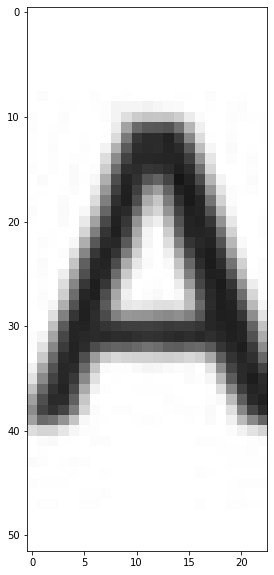

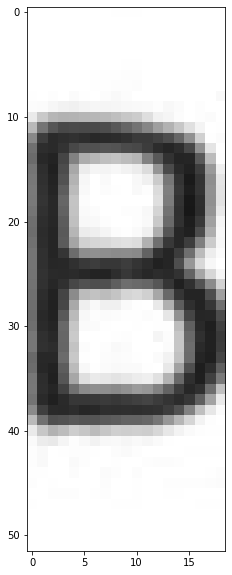

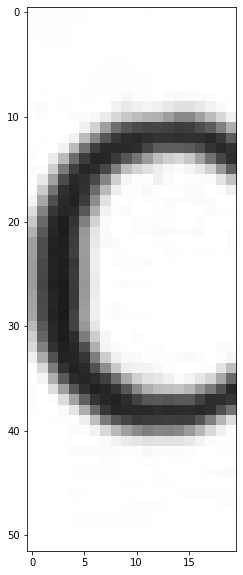

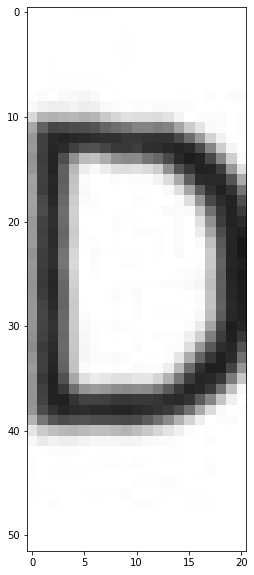

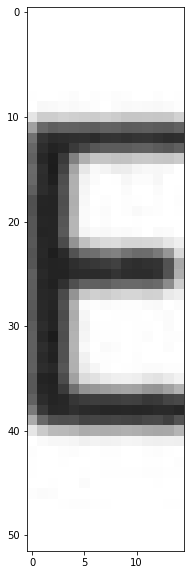

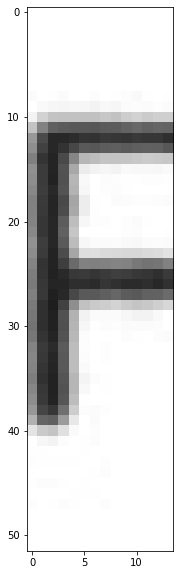

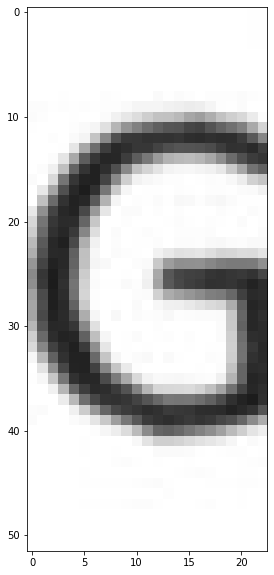

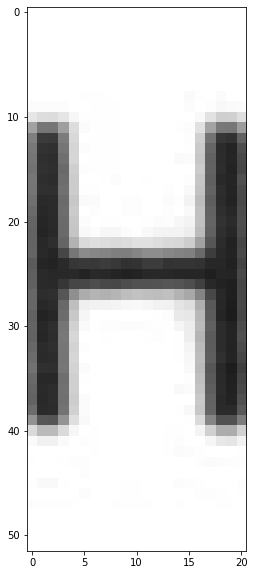

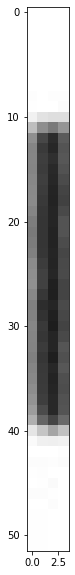

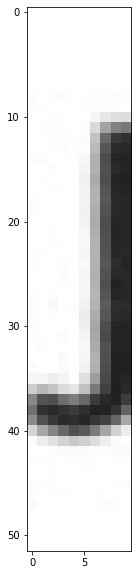

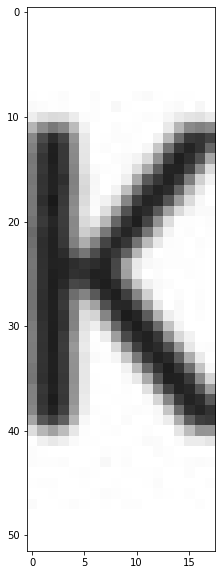

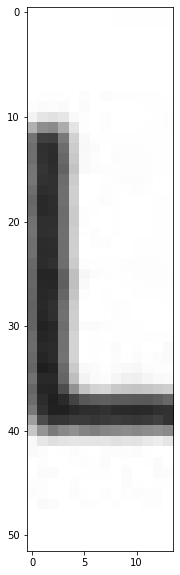

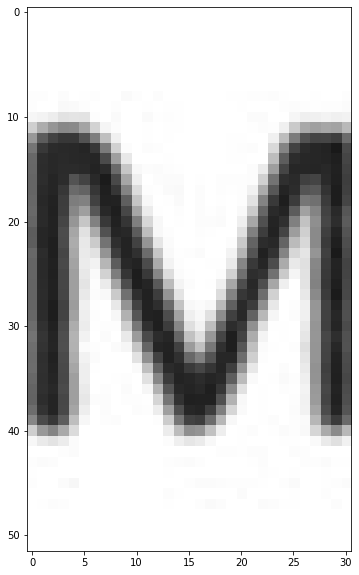

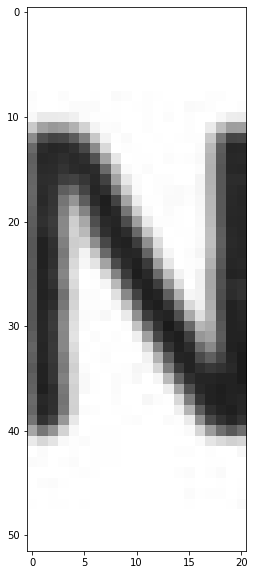

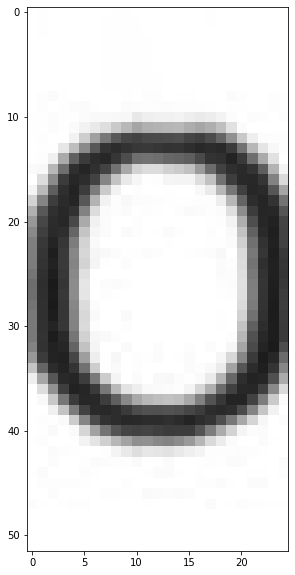

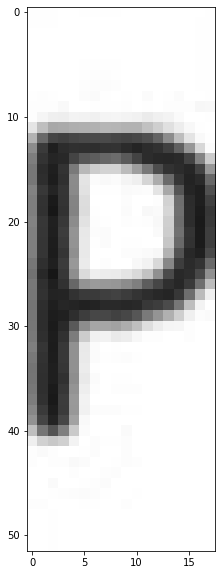

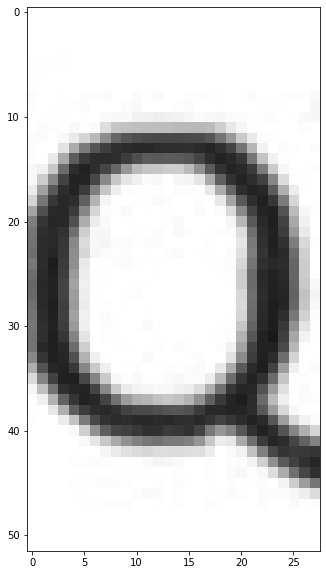

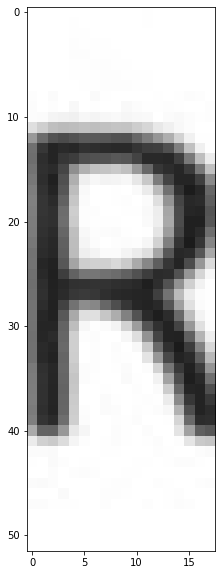

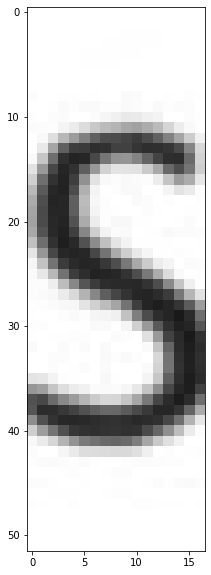

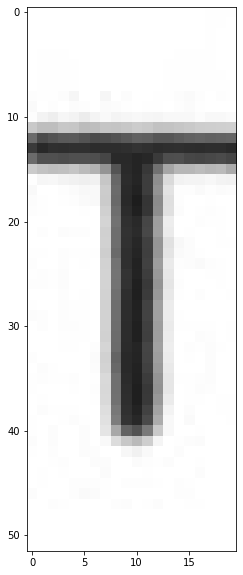

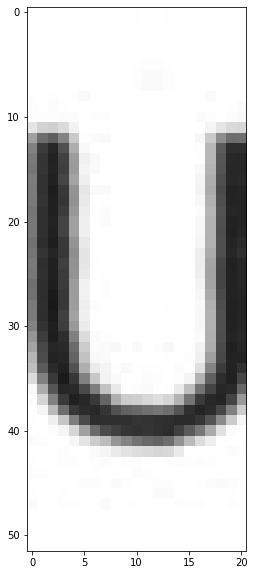

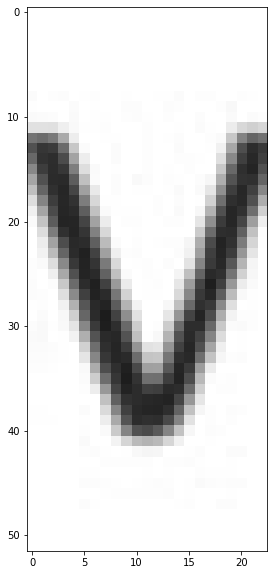

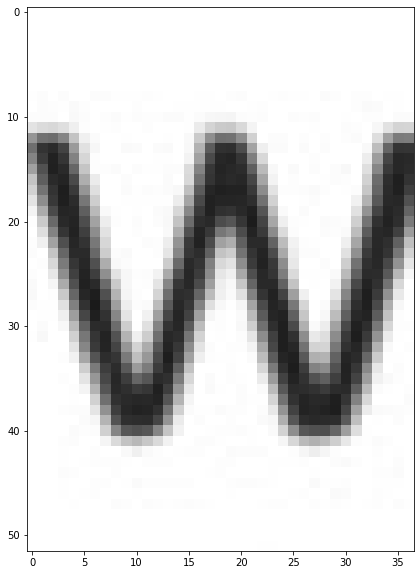

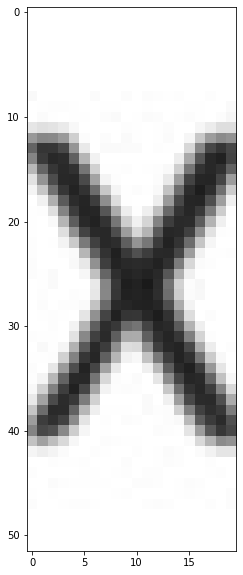

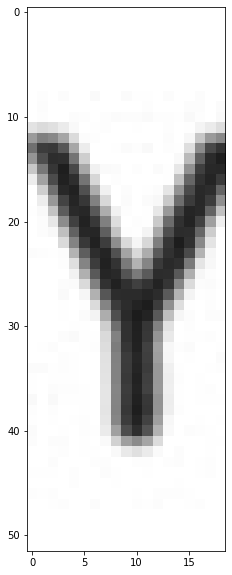

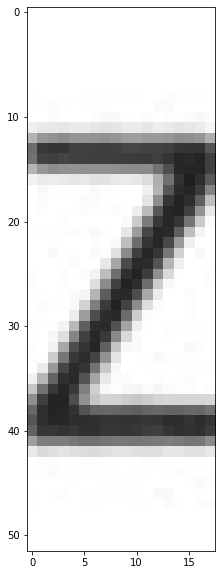

In [15]:
indices_debut_fin_ligne = indices_lignes[10]

ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

for elt in ranges :
    plt.figure(figsize=(20,10))
    plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]])
    plt.show()